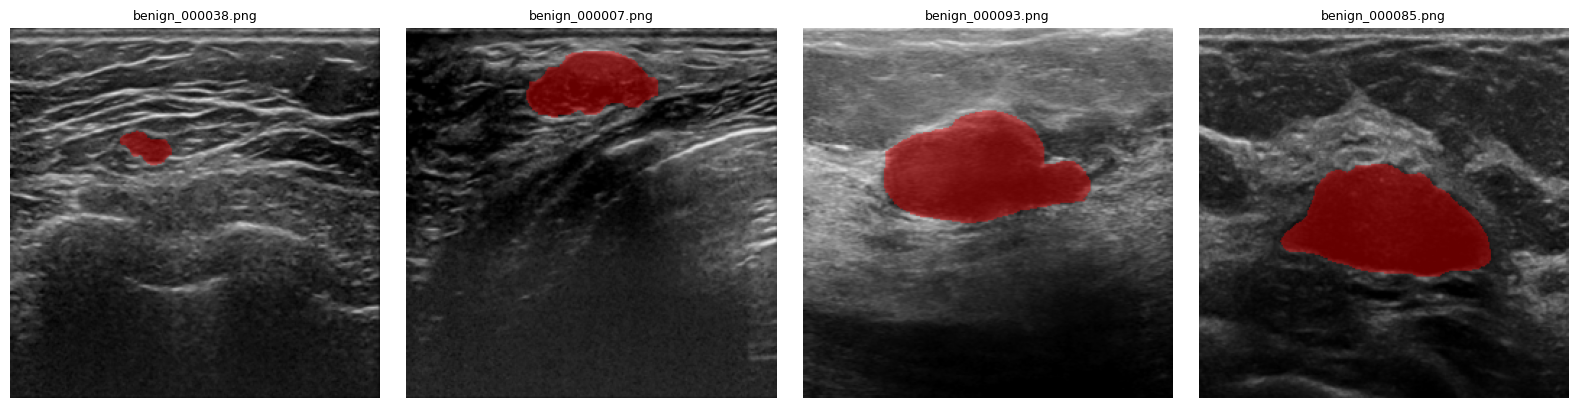

In [1]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def make_overlay_array(image_path, mask_path, opacity=0.5, mask_color=(1, 0, 0)):
    """
    Return an overlayed RGB image (as numpy array) where the binary mask
    is blended onto the original image with the given color and opacity.
    """
    image = Image.open(image_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")

    image_np = np.asarray(image, dtype=np.float32) / 255.0
    mask_np = np.asarray(mask, dtype=np.uint8)

    mask_rgb = np.zeros_like(image_np, dtype=np.float32)
    mask_rgb[..., 0] = mask_color[0]
    mask_rgb[..., 1] = mask_color[1]
    mask_rgb[..., 2] = mask_color[2]

    overlay = image_np.copy()
    mask_area = mask_np > 0
    overlay[mask_area] = (1 - opacity) * image_np[mask_area] + opacity * mask_rgb[mask_area]
    return overlay

def visualize_four_in_row(image_dir, mask_dir, opacity=0.5, mask_color=(1, 0, 0), seed=None):
    """
    Randomly sample up to 4 image/mask pairs and display them in one horizontal row.
    If there are fewer than 4 images in the folder, it will show as many as available.
    """
    if seed is not None:
        random.seed(seed)

    image_files = sorted([f for f in os.listdir(image_dir) if f.lower().endswith('.png')])
    if len(image_files) == 0:
        print("No images found.")
        return

    k = min(4, len(image_files))
    selected = random.sample(image_files, k=k)

    # Create a 1 x 4 grid (some axes may be hidden if k < 4)
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    # Ensure axes is iterable
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]

    for i, ax in enumerate(axes):
        if i < k:
            fname = selected[i]
            image_path = os.path.join(image_dir, fname)
            mask_path = os.path.join(mask_dir, fname)  # same name for mask
            overlay = make_overlay_array(image_path, mask_path, opacity=opacity, mask_color=mask_color)
            ax.imshow(overlay)
            ax.set_title(fname, fontsize=9)
            ax.axis('off')
        else:
            # Hide unused axes if fewer than 4 images
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_four_in_row(
    image_dir='UDIAT/full/imgs',
    mask_dir='UDIAT/full/masks',
    opacity=0.4,
    mask_color=(1, 0, 0),  # red
    seed=42
)
